In [263]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Import Mobility Data

In [264]:
# keep FIPS as string to preserve leading zeroes

In [265]:
combined = pd.read_csv(r"/Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets/hia_covid_combined.csv", dtype={'County_FIPS': 'str'} )

In [266]:
combined.Name = combined.locationcol

In [267]:
combined.Deaths.isna().value_counts()

False    1008962
Name: Deaths, dtype: int64

In [268]:
combined['Date'] = combined['Date'].astype("datetime64")

In [269]:
combined_sub = combined.drop(columns=['Unnamed: 0','Date.1','Country/Region'])

In [270]:
combined_sub.Name.isna().value_counts()

False    1008962
Name: Name, dtype: int64

In [271]:
combined_sub.locationcol.isna().value_counts()

False    1008962
Name: locationcol, dtype: int64

In [272]:
combined_sub['Date'].isna().value_counts()

False    1008962
Name: Date, dtype: int64

In [273]:
combined_sub['State'].isna().value_counts()

False    1008962
Name: State, dtype: int64

## Examine per-county distributions

In [274]:
list_cols = list(combined_sub.columns)

list_cols = [i for i in list_cols if i not in ["Date","locationcol","State","State Code","Name","County_FIPS","Region","Division","Metro"]]
list_cols

['retail_and_recreation_PCT_CFB',
 'grocery_and_pharmacy_PCT_CFB',
 'parks_PCT_CFB',
 'transit_stations_PCT_CFB',
 'workplaces_PCT_CFB',
 'residential_PCT_CFB',
 'retail_and_recreation_PCT_CFB_RollingAvg',
 'grocery_and_pharmacy_PCT_CFB_RollingAvg',
 'parks_PCT_CFB_RollingAvg',
 'transit_stations_PCT_CFB_RollingAvg',
 'workplaces_PCT_CFB_RollingAvg',
 'residential_PCT_CFB_RollingAvg',
 'HS_DIPLOMA_ONLY_2018',
 'SOME_COLLEGE_2018',
 'BACHELORS_PLUS_2018',
 'Poverty_PCT_2018',
 'UrbanCD',
 'Median_Income_2018',
 'Population_ACS',
 'Population_Black_ACS',
 'Population_Hisp_ACS',
 'Population_Native_ACS',
 'PCT_Black_ACS',
 'PCT_Hisp_ACS',
 'PCT_Native_ACS',
 'UrbanCD_Description',
 'Confirmed',
 'Deaths',
 'Deaths_Previous',
 'Confirmed_Previous',
 'Deaths_New',
 'Deaths_New_7',
 'Deaths_New_14',
 'Deaths_New_21',
 'Deaths_New_28',
 'Confirmed_New',
 'Confirmed_New_RollingAvg',
 'Deaths_New_RollingAvg',
 'Deaths_New_7_RollingAvg',
 'Deaths_New_14_RollingAvg',
 'Deaths_New_21_RollingAvg',


In [275]:
#county_desc = combined_sub[["locationcol","County_FIPS","State Code","Region","Division","Metro"]].drop_duplicates()
#county = pd.DataFrame(county) 
#county.reset_index(inplace=True)

county = combined_sub.groupby(["Name","County_FIPS","State Code","Region","Division","Metro"])[list_cols].max()

In [276]:
county.reset_index(inplace=True)

In [277]:
county_samp = county.sample(frac=.1)

In [278]:
county.PCT_Hisp_ACS.describe()

count    2823.000000
mean        9.147540
std        13.683896
min         0.000000
25%         2.104021
50%         4.065384
75%         9.320412
max        99.184800
Name: PCT_Hisp_ACS, dtype: float64

In [279]:
county[county.Name.str.contains("Fairfax")]

,Name,County_FIPS,State Code,Region,Division,Metro,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,...,Deaths_New_14,Deaths_New_21,Deaths_New_28,Confirmed_New,Confirmed_New_RollingAvg,Deaths_New_RollingAvg,Deaths_New_7_RollingAvg,Deaths_New_14_RollingAvg,Deaths_New_21_RollingAvg,Deaths_New_28_RollingAvg
799,Fairfax City|Virginia,51600,VA,South,South Atlantic,Large_metro,14.0,27.0,-26.0,NaN,...,2.0,2.0,2.0,10.0,3.714286,0.428571,0.428571,0.428571,0.428571,0.428571


In [280]:
county.Deaths_PER_100K.describe()

AttributeError: 'DataFrame' object has no attribute 'Deaths_PER_100K'

In [258]:
county[(county.Deaths_PER_100K >= county.Deaths_PER_100K.max()/2)]

,Name,County_FIPS,State Code,Region,Division,Metro,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,...,Deaths_New_14_PER_100K,Deaths_New_21_PER_100K,Deaths_New_28_PER_100K,Confirmed_New_PER_100K,Confirmed_New_RollingAvg_PER_100K,Deaths_New_RollingAvg_PER_100K,Deaths_New_7_RollingAvg_PER_100K,Deaths_New_14_RollingAvg_PER_100K,Deaths_New_21_RollingAvg_PER_100K,Deaths_New_28_RollingAvg_PER_100K
44,Allen|Louisiana,22003,LA,South,West South Central,Noncore_adjacent,38.0,40.0,NaN,NaN,...,15.584213,15.584213,15.584213,385.709277,199.255297,5.565790,5.565790,5.565790,5.565790,5.565790
66,Apache|Arizona,04001,AZ,West,Mountain,Noncore_adjacent,34.0,46.0,180.0,96.0,...,15.362699,15.362699,15.362699,202.508310,109.334536,3.790796,3.790796,3.790796,3.790796,3.790796
183,Bienville|Louisiana,22013,LA,South,West South Central,Noncore_adjacent,25.0,26.0,NaN,NaN,...,28.972910,28.972910,28.972910,217.296827,58.980567,8.277974,8.277974,8.277974,8.277974,8.277974
184,Big Horn|Montana,30003,MT,West,Mountain,Noncore_adjacent,-8.0,9.0,NaN,87.0,...,30.097818,30.097818,30.097818,797.592175,236.482855,8.599377,8.599377,8.599377,8.599377,8.599377
219,Bottineau|North Dakota,38009,ND,Midwest,West North Central,Noncore_adjacent,36.0,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,330.777327,152.501235,2.147905,2.147905,2.147905,2.147905,2.147905
248,Bronx|New York,36005,NY,Northeast,Middle Atlantic,Large_metro,15.0,29.0,105.0,9.0,...,61.201528,61.201528,61.201528,101.796481,80.090889,9.802842,9.802842,9.802842,9.802842,9.802842
252,Brooks|Texas,48047,TX,South,West South Central,Noncore_adjacent,26.0,33.0,NaN,34.0,...,55.164805,55.164805,55.164805,303.406427,94.568237,7.880686,17.731544,17.731544,17.731544,17.731544
332,Cameron|Texas,48061,TX,South,West South Central,Smaller_metro,24.0,27.0,30.0,32.0,...,22.608228,22.608228,22.608228,605.662528,230.739915,6.017528,6.017528,6.017528,6.017528,6.017528
339,Candler|Georgia,13043,GA,South,South Atlantic,Noncore_adjacent,35.0,19.0,NaN,NaN,...,18.358730,18.358730,18.358730,257.022214,74.746256,3.934013,6.556689,6.556689,6.556689,6.556689
471,Clarke|Mississippi,28023,MS,South,East South Central,Micropolitan,25.0,34.0,NaN,NaN,...,18.646280,18.646280,18.646280,161.601094,59.490513,7.103345,7.103345,7.103345,6.215427,6.215427


In [259]:
county[county.Metro.isna() == True]

,Name,County_FIPS,State Code,Region,Division,Metro,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,...,Deaths_New_14_PER_100K,Deaths_New_21_PER_100K,Deaths_New_28_PER_100K,Confirmed_New_PER_100K,Confirmed_New_RollingAvg_PER_100K,Deaths_New_RollingAvg_PER_100K,Deaths_New_7_RollingAvg_PER_100K,Deaths_New_14_RollingAvg_PER_100K,Deaths_New_21_RollingAvg_PER_100K,Deaths_New_28_RollingAvg_PER_100K


## Longitudinal graphs by county

In [260]:
import random 


In [262]:
bigh = combined_sub[combined_sub.County_FIPS == "04001"]
bigh.head(40)

,Date,County_FIPS,State Code,Name,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,workplaces_PCT_CFB,residential_PCT_CFB,...,Deaths_New_28_PER_100K,Confirmed_New_PER_100K,Confirmed_New_RollingAvg_PER_100K,Deaths_New_RollingAvg_PER_100K,Deaths_New_7_RollingAvg_PER_100K,Deaths_New_14_RollingAvg_PER_100K,Deaths_New_21_RollingAvg_PER_100K,Deaths_New_28_RollingAvg_PER_100K,Region,Division
31232,2020-01-22,04001,AZ,Apache|Arizona,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,Mountain
31233,2020-01-23,04001,AZ,Apache|Arizona,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,Mountain
31234,2020-01-24,04001,AZ,Apache|Arizona,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,Mountain
31235,2020-01-25,04001,AZ,Apache|Arizona,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,Mountain
31236,2020-01-26,04001,AZ,Apache|Arizona,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,Mountain
31237,2020-01-27,04001,AZ,Apache|Arizona,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,Mountain
31238,2020-01-28,04001,AZ,Apache|Arizona,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,Mountain
31239,2020-01-29,04001,AZ,Apache|Arizona,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,Mountain
31240,2020-01-30,04001,AZ,Apache|Arizona,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,Mountain
31241,2020-01-31,04001,AZ,Apache|Arizona,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,Mountain


In [223]:



plt.figure(figsize=(10,5)) 
sns.lineplot(x="date", y="Confirmed_New_RollingAvg_PER_100K", label="Deaths_PER_100K", data=bigh)
sns.lineplot(x="date", y="Deaths_New_RollingAvg_PER_100K", label="Deaths_PER_100K", data=bigh)
plt.legend(loc="upper left")
plt.show()

ValueError: Could not interpret value `date` for parameter `x`

<Figure size 720x360 with 0 Axes>

In [224]:
combined_sub[combined_sub.County_FIPS == "56045"].head(40)

,Date,County_FIPS,State Code,Name,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,workplaces_PCT_CFB,residential_PCT_CFB,...,Deaths_New_28_PER_100K,Confirmed_New_PER_100K,Confirmed_New_RollingAvg_PER_100K,Deaths_New_RollingAvg_PER_100K,Deaths_New_7_RollingAvg_PER_100K,Deaths_New_14_RollingAvg_PER_100K,Deaths_New_21_RollingAvg_PER_100K,Deaths_New_28_RollingAvg_PER_100K,Region,Division
1033426,2020-01-22,56045,WY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,Mountain
1033427,2020-01-23,56045,WY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,Mountain
1033428,2020-01-24,56045,WY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,Mountain
1033429,2020-01-25,56045,WY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,Mountain
1033430,2020-01-26,56045,WY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,Mountain
1033431,2020-01-27,56045,WY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,Mountain
1033432,2020-01-28,56045,WY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,Mountain
1033433,2020-01-29,56045,WY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,Mountain
1033434,2020-01-30,56045,WY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,Mountain
1033435,2020-01-31,56045,WY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,Mountain


In [75]:
combined_sub[combined_sub.date.isna() == False]

,date,County_FIPS,StateCD,Name,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,workplaces_PCT_CFB,residential_PCT_CFB,...,Deaths_New_28_PER_100K,Confirmed_New_PER_100K,Confirmed_New_RollingAvg_PER_100K,Deaths_New_RollingAvg_PER_100K,Deaths_New_7_RollingAvg_PER_100K,Deaths_New_14_RollingAvg_PER_100K,Deaths_New_21_RollingAvg_PER_100K,Deaths_New_28_RollingAvg_PER_100K,Region,Division
24,2020-02-15,01001,AL,Autauga County,5.0,7.0,NaN,NaN,-4.0,NaN,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,South,East South Central
25,2020-02-16,01001,AL,Autauga County,0.0,1.0,-23.0,NaN,-4.0,NaN,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,South,East South Central
26,2020-02-17,01001,AL,Autauga County,8.0,0.0,NaN,NaN,-27.0,5.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,South,East South Central
27,2020-02-18,01001,AL,Autauga County,-2.0,0.0,NaN,NaN,2.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,South,East South Central
28,2020-02-19,01001,AL,Autauga County,-2.0,0.0,NaN,NaN,2.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,South,East South Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033727,2020-11-18,56045,WY,Weston County,NaN,NaN,NaN,NaN,-23.0,NaN,...,NaN,98.356049,60.217989,0.000000,2.007266,NaN,NaN,NaN,West,Mountain
1033728,2020-11-19,56045,WY,Weston County,NaN,NaN,NaN,NaN,-19.0,NaN,...,NaN,28.101728,68.247054,0.000000,2.007266,NaN,NaN,NaN,West,Mountain
1033729,2020-11-20,56045,WY,Weston County,NaN,NaN,NaN,NaN,-18.0,NaN,...,NaN,126.457777,68.247054,0.000000,NaN,NaN,NaN,NaN,West,Mountain
1033732,2020-11-23,56045,WY,Weston County,NaN,NaN,NaN,NaN,-23.0,NaN,...,NaN,0.000000,68.247054,2.007266,NaN,NaN,NaN,NaN,West,Mountain


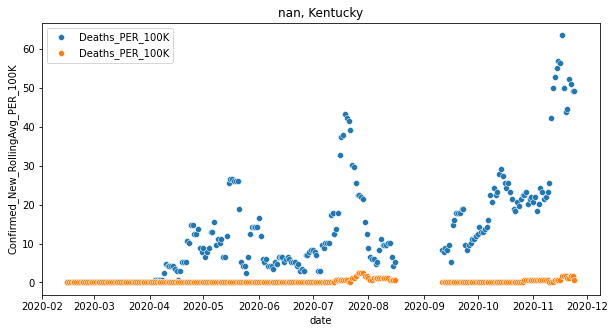

In [73]:
u_FIPS = list(combined_sub.County_FIPS.unique())
random_FIPS =  random.choice(u_FIPS)

random_df = combined_sub[combined_sub.County_FIPS == random_FIPS]
random_name = combined_sub[combined_sub.County_FIPS == random_FIPS]['Name'].iloc[0]
random_state = combined_sub[combined_sub.County_FIPS == random_FIPS]['State'].iloc[0]

plt.figure(figsize=(10,5)) 
sns.scatterplot(x="date", y="Confirmed_New_RollingAvg_PER_100K", label="Deaths_PER_100K", data=random_df)
sns.scatterplot(x="date", y="Deaths_New_RollingAvg_PER_100K", label="Deaths_PER_100K", data=random_df)
plt.legend(loc="upper left")
plt.title("{title}, {state}".format(title=random_name, state=random_state))
plt.show()

In [ ]:
import random as random

list_counties = list(county[county.Population_ACS >= 1000000].County_FIPS.unique())
list_random = random.choices(list_counties, k=4)

In [ ]:
for i in list_random:
    bigh = combined_sub[combined_sub.County_FIPS == i]
    bigh = bigh[bigh.date <= '2020-10-20']
    bigh = bigh[bigh.date >= '2020-06-01']
    name_county = bigh.Name.iloc[0]+' '+bigh.StateCD.iloc[0]
    plt.figure(figsize=(12,3)) 
    ax = sns.lineplot(x="date", y="Confirmed_New_RollingAvg_PER_100K", label="Confirmed", data=bigh)
    ax2 = ax.twinx()
    ax2 = sns.lineplot(x="date", y="Deaths_New_7_RollingAvg_PER_100K", label="Deaths", color='red', data=bigh)
    #ax2 = sns.lineplot(x="date", y="Deaths_New_7_RollingAvg_PER_100K", label="Deaths", color='orange', data=bigh)
    #ax2 = sns.lineplot(x="date", y="Deaths_New_21_RollingAvg_PER_100K", label="Deaths", color='green', data=bigh)
    plt.title("{x} - 2020-06 to 2020-10".format(x=name_county))
    fig.legend(loc="upper right")
    plt.show()

In [ ]:
for i in list(combined_sub.Metro.unique()):
    dataframe = combined_sub[(combined_sub.date >= '2020-08-01') & (combined_sub.Metro == i)]
    dataframe = dataframe[dataframe.Deaths_New_14_RollingAvg_PER_100K > 0]
    dataframe = dataframe[dataframe.Confirmed_New_RollingAvg_PER_100K > 0]
    dataframe = dataframe.sample(frac=.1)
    #dataframe = dataframe.Confirmed_New_RollingAvg_PER_100K > 0
    sns.scatterplot(x="Deaths_New_14_RollingAvg_PER_100K",y="Confirmed_New_RollingAvg_PER_100K",label="{x}".format(x=i),data=dataframe)
    plt.show()

In [ ]:
bigh[(bigh.date >= "2020-06-01") &(bigh.date <= "2020-07-01")][['date','Deaths','Deaths_New','Deaths_New_7','Deaths_New_7_RollingAvg','Deaths_New_7_RollingAvg_PER_100K']]

In [ ]:
list_tup = []
for i in range(4,9):
    a = '2020-0{c}-01'.format(c=i)
    b = '2020-0{c}-01'.format(c=i+1)
    list_tup.append((a,b))

for i in range(10,11):
    a = '2020-{c}-01'.format(c=i)
    b = '2020-{c}-01'.format(c=i+1)
    list_tup.append((a,b))

## Make the county level dataframe population - weighted 

In [ ]:
list_frame = []

from tqdm import tqdm

for i in tqdm(list(county.County_FIPS.unique())):
    frame = county[county.County_FIPS == i]
    frame['pop_1k'] = frame['Population_ACS']/1000 # Each row will represent 1k people
    frame['key'] = 'key'
    joinframe = pd.DataFrame(pd.Series(list(range(0,int(frame.pop_1k.max())))))
    joinframe['key'] = 'key'
    joinframe.columns = ['val','key']
    cartesian = frame.merge(joinframe, on="key")
    #frame_weighted = cartesian[cartesian.Deaths <= cartesian.val]
    list_frame.append(cartesian)

In [ ]:
frame_concat = pd.concat(list_frame)

In [ ]:
frame_concat

In [ ]:
plt.figure(figsize=(16,9)) 
frame = frame_concat.sample(frac=.05)
frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro","Noncore_adjacent"])]
frame.sort_values(by="Metro", inplace=True)
#frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro"])]
frame = frame.sort_values(by="Metro")
#sns.violinplot(x="Metro", y="Deaths_PER_100K", label="work", data=frame, scale="count")
sns.boxplot(x="Metro", y="Deaths_PER_100K", data=frame,  boxprops={'facecolor':'None'}, fliersize=0)
sns.stripplot(x="Metro", y="Deaths_PER_100K", label="work", data=frame, size=2, alpha=.8, dodge=True, palette="viridis")
plt.show()


In [ ]:
plt.figure(figsize=(18,9)) 
frame = frame_concat #.sample(frac=.25)
frame.sort_values(by="Division", inplace=True)
frame = frame.sort_values(by="Region")
sns.violinplot(x="Division", y="Deaths_PER_100K", label="work", data=frame)
#sns.boxplot(x="Division", y="Deaths_PER_100K", data=frame,  boxprops={'facecolor':'None'}, fliersize=0)
sns.swarmplot(x="Division", y="Deaths_PER_100K", label="work", data=frame, size=.5, alpha=.6, dodge=True, palette="viridis")
plt.show()


In [ ]:
plt.figure(figsize=(18,9)) 
frame = frame_concat[frame_concat.Division == "New England"] #.sample(frac=.25)
frame.sort_values(by="Metro", inplace=True)
ax = sns.violinplot(x="Metro", y="Deaths_PER_100K", label="work", palette="viridis", alpha=.2, scale="count", data=frame)
#sns.boxplot(x="Metro", y="Deaths_PER_100K", data=frame,  boxprops={'facecolor':'None'}, fliersize=0)
ax = sns.swarmplot(x="Metro", y="Deaths_PER_100K", label="work", data=frame, size=2, dodge=True, palette="viridis")
plt.setp(ax.collections, alpha=.3)
plt.show()


In [ ]:
import numpy as np
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the widths of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

In [ ]:
def boxplot_with_violins(df, Yvar = "Deaths_PER_100K", group="Region"):
    frame = df
    frame = frame.sort_values(by=group)
    #frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro","Noncore_adjacent"])]

    fig = plt.figure(figsize=(9,6))

    ax = sns.boxplot(x=group, y=Yvar, data=frame, boxprops={'facecolor':'None'}, fliersize=0)
    ax = sns.violinplot(x=group, y=Yvar, scale="count", data=frame, inner="quart", despine=True)

    plt.setp(ax.collections, alpha=.4)
    plt.ylim(-10,frame["{Yvar}".format(Yvar=Yvar)].max()*.95)

    adjust_box_widths(fig, 0.9)
    
    fig.show()

In [ ]:
def upper_limit(series):
    from scipy.stats import iqr
    import numpy as np
    Q3 = np.percentile(series, 75, interpolation = 'midpoint') 
    return int(Q3+(4*iqr(series)))

In [ ]:
def boxplot_with_violins_grp(df, Yvar = "Deaths_PER_100K",  group="Region"):
    frame = df
    frame = frame.sort_values(by=group)
    #frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro","Noncore_adjacent"])]

    fig = plt.figure(figsize=(24,12))
    
    ax = sns.boxplot(x=group, y=Yvar, hue="Metro", data=frame, boxprops={'facecolor':'None'}, fliersize=0)
    ax = sns.violinplot(x=group, y=Yvar, hue="Metro", scale="count", data=frame, inner="quart", despine=True)

    #Make legend distinct 
    handles, labels = ax.get_legend_handles_labels()
    num_legend = len(df["{x}".format(x=group)].unique())
    plt.legend(handles[0:num_legend], labels[0:num_legend], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.setp(ax.collections, alpha=.4)
    
    #plt.ylim(-10,frame["{Yvar}".format(Yvar=Yvar)].max()*.75)
   
    upper_limit_number = upper_limit(frame["{Yvar}".format(Yvar=Yvar)])
    plt.ylim(-10,upper_limit_number)
    adjust_box_widths(fig, 0.8)
    #plt.legend()
    fig.show()

In [ ]:
boxplot_with_violins_grp(frame_concat,Yvar = "Confirmed_PER_100K")

In [ ]:
frame = frame_concat.sample(frac=.1)
#frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro","Noncore_adjacent"])]
#plt.figure(figsize=(22,9)) 

fig = plt.figure(figsize=(22, 9))

ax = sns.boxplot(x="Region", y="Deaths_PER_100K", data=frame, boxprops={'facecolor':'None'}, fliersize=0)
ax = sns.swarmplot(x="Region", y="Deaths_PER_100K",  alpha=.95, data=frame, size=.75, dodge=True)
#plt.setp(ax.collections, alpha=.9)
plt.ylim(-10,frame.Deaths_PER_100K.max()*1.1)

adjust_box_widths(fig, 0.9)

In [ ]:
frame_concat.columns

In [ ]:
frame = frame_concat
frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro","Noncore_adjacent"])]
#plt.figure(figsize=(22,9)) 

fig = plt.figure(figsize=(22, 9))

#ax = sns.boxplot(x="Division", y="Confirmed_New_RollingAvg_PER_100K", hue="Metro", data=frame, fliersize=0)
ax = sns.violinplot(x="Division", y="Confirmed_New_RollingAvg_PER_100K",  hue="Metro", scale="count", data=frame, inner="quart", size=2, dodge=True, despine=True)
plt.setp(ax.collections, alpha=.4)
plt.ylim(-10,150)

adjust_box_widths(fig, 0.9)

In [ ]:
pop = pd.DataFrame(frame.groupby(["Division"])["Population_ACS"].sum())

In [ ]:
pop['pop'] = pop.Population_ACS/1000000

In [ ]:
1.553625e+04

In [ ]:
frame = frame_concat.sample(frac=.1)
frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro"])]
#plt.figure(figsize=(22,9)) 

fig = plt.figure(figsize=(22, 9))

ax = sns.boxplot(x="Region", y="Deaths_New_7_RollingAvg_PER_100K", hue="Metro", data=frame, boxprops={'facecolor':'None'}, fliersize=0)
ax = sns.violinplot(x="Region", y="Deaths_New_7_RollingAvg_PER_100K",  hue="Metro", scale="count", data=frame, inner="quart", size=2, dodge=True, despine=True)
plt.setp(ax.collections, alpha=.4)
plt.ylim(-1,2.5)

adjust_box_widths(fig, 0.9)

In [ ]:
sns.distplot(frame.Deaths_New_7_RollingAvg_PER_100K)

In [ ]:
combined_sub['week_of_yr'] = combined_sub.date.dt.week

In [ ]:
cols = list(combined_sub.columns)

list_df = [] 

for i in tqdm(range(12,combined_sub.week_of_yr.max())):
    county = combined_sub[(combined_sub.week_of_yr == i)]
    date = county.date.max()
    county = county.groupby(["County_FIPS","Metro","Division","StateCD"])[cols].mean()
    county = pd.DataFrame(county)
    county['date'] = date
    county.reset_index(inplace=True)
    list_df.append(county)

In [ ]:
list_df[2] #.Metro

In [ ]:
def explode_df_pop_weight(df):
    list_frame  = []
    for i in tqdm(list(df.County_FIPS.unique())):
        frame = df[df.County_FIPS == i]
        frame['pop_1k'] = frame['Population_ACS']/1000 # Each row will represent 1k people
        frame['key'] = 'key'
        joinframe = pd.DataFrame(pd.Series(list(range(0,int(frame.pop_1k.max())))))
        joinframe['key'] = 'key'
        joinframe.columns = ['val','key']
        cartesian = frame.merge(joinframe, on="key")
        list_frame.append(cartesian)
    exploded_frame = pd.concat(list_frame)
    return exploded_frame

In [ ]:
exp = explode_df_pop_weight(list_df[2])

In [ ]:
list_exploded_df = [explode_df_dateweight(i) for i in list_df]

In [ ]:
colslist = list(list_exploded_df[2].columns)
Yvarlist = [i for i in colslist if "RollingAvg" in i]

In [ ]:
colslist

In [ ]:
Yvar_list = [
 #'retail_and_recreation_PCT_CFB_RollingAvg',
 #'grocery_and_pharmacy_PCT_CFB_RollingAvg',
 #'parks_PCT_CFB_RollingAvg',
 #'transit_stations_PCT_CFB_RollingAvg',
 'workplaces_PCT_CFB_RollingAvg',
 'residential_PCT_CFB_RollingAvg',
 'Confirmed_New_RollingAvg_PER_100K',
 'Deaths_New_RollingAvg_PER_100K']

In [ ]:
grouplist = ['Metro','Region']

In [ ]:
import os
os.getcwd()
os.chdir("/Users/philip.ballentine/Documents/grphimg")

In [ ]:
#conda install -c conda-forge imageio

In [ ]:
def gif_from_images(animated_filename="movie.gif"):
    """ goes into the working directory (set earlier) and combined all images into an animated gif"""
    import imageio
    image_list = sorted(os.listdir(os.getcwd()))
    image_list_sub = [i for i in image_list if '2020' in i]
    images = []
    for filename in image_list_sub:
        images.append(imageio.imread(filename))
    imageio.mimsave(animated_filename+'.gif', images, duration=.5)

In [ ]:
combined_sub.columns

In [ ]:
combined_sub['retail_and_recreation_PCT_CFB'].quantile(.10)

In [ ]:
combined_sub['retail_and_recreation_PCT_CFB'].quantile(.9)

In [ ]:
def loop_for_gif_by_metro(Yvar="Deaths_PER_100K", group="Metro"):
    
    ## Creating file structure
    import os 
    foldername = "{Yvar}_by_{group}".format(Yvar=Yvar, group=group)
    try:
        os.chdir("/Users/philip.ballentine/Documents/grphimg/{foldername}".format(foldername=foldername))
    except:
        os.mkdir("/Users/philip.ballentine/Documents/grphimg/{foldername}".format(foldername=foldername))
        os.chdir("/Users/philip.ballentine/Documents/grphimg/{foldername}".format(foldername=foldername))
    
    ## Iterating through dataframes and creating the plots
    for i in tqdm(random.choices(list_exploded_df, k= 3)):
    #for i in tqdm(list_exploded_df): 
        frame = i
        frame = frame.sort_values(by='{group}'.format(group=group))
        fig = plt.figure(figsize=(9, 6))
        #frame = frame[frame.Metro.isin(["Large_metro","Micropolitan","Smaller_metro"])]
        ax = sns.boxplot(x=group, y=Yvar, data=frame, boxprops={'facecolor':'None'}, fliersize=0)
        ax = sns.violinplot(x=group, y=Yvar, scale="count", data=frame, inner="quart", dodge=True, despine=True)

        plt.setp(ax.collections, alpha=.4)
        ## Setting the Y-Lims
        #if "PCT" in Yvar:
            #plt.ylim(combined_sub['{Yvar}'.format(Yvar=Yvar)].min(),combined_sub['{Yvar}'.format(Yvar=Yvar)].max())
            #quant10 = combined_sub['{Yvar}'.format(Yvar=Yvar)].quantile(.1)
            #quant90 = combined_sub['{Yvar}'.format(Yvar=Yvar)].quantile(.9)
            #plt.ylim(quant10,quant90)
        #if "Confirmed" in Yvar: 
            #stdev = combined_sub['{Yvar}'.format(Yvar=Yvar)].std()
            #mean = combined_sub['{Yvar}'.format(Yvar=Yvar)].mean()
            #limits = ((mean-(stdev*3)),(mean+(stdev*3)))
            #quant10 = combined_sub['{Yvar}'.format(Yvar=Yvar)].quantile(.1)
            #quant90 = combined_sub['{Yvar}'.format(Yvar=Yvar)].quantile(.9)
            #plt.ylim(quant10,quant90)
       # else: 
            #stdev = combined_sub['{Yvar}'.format(Yvar=Yvar)].std()
            #plt.ylim(-1,combined_sub['{Yvar}'.format(Yvar=Yvar)].mean()+(5*stdev))
        
        ## Titles and file saving
        datestr = str(i.date.max())[0:11]
        plt.title("{datestr} - {Yvar} by {group}, Population Weighted".format(datestr=datestr, Yvar=Yvar, group=group))
        plt.tight_layout()
        plt.savefig("{datestr}.png".format(datestr=datestr), dpi=300)
        #print("{datestr}.png has been created in {foldername}".format(datestr=datestr, foldername=foldername))

## Animated GIF creation
    gif_from_images(animated_filename=foldername)

In [ ]:
loop_for_gif_by_metro("retail_and_recreation_PCT_CFB", group="Metro")

In [ ]:
all_combo_list = []
for i in Yvar_list:
    for x in grouplist:
        all_combo_list.append((i,x))

In [ ]:
all_combo_list

In [ ]:
for i in all_combo_list:
    try:
        loop_for_gif_by_metro(Yvar=i[0], group=i[1])
    except:
        print("failure for {x}".format(x=str(i)))
        continue